In [29]:
import pandas as pd
import numpy as np
from pathlib import Path
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
p1 = Path.cwd() / 'back_data'
fueleco = pd.read_csv(p1 / 'vehicles.csv.zip', parse_dates=['createdOn', 'modifiedOn'])
fueleco.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_20092\4152661709.py:2: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  fueleco = pd.read_csv(p1 / 'vehicles.csv.zip', parse_dates=['createdOn', 'modifiedOn'])
c:\Users\admin\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
c:\Users\admin\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
c:\Users\admin\anaconda3\lib\site-packag

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,2013-01-01,2013-01-01,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,2013-01-01,2013-01-01,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,2013-01-01,2013-01-01,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,2013-01-01,2013-01-01,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,2013-01-01,2013-01-01,NaN,0,0,0


In [4]:
fueleco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39101 entries, 0 to 39100
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   barrels08        39101 non-null  float64       
 1   barrelsA08       39101 non-null  float64       
 2   charge120        39101 non-null  float64       
 3   charge240        39101 non-null  float64       
 4   city08           39101 non-null  int64         
 5   city08U          39101 non-null  float64       
 6   cityA08          39101 non-null  int64         
 7   cityA08U         39101 non-null  float64       
 8   cityCD           39101 non-null  float64       
 9   cityE            39101 non-null  float64       
 10  cityUF           39101 non-null  float64       
 11  co2              39101 non-null  int64         
 12  co2A             39101 non-null  int64         
 13  co2TailpipeAGpm  39101 non-null  float64       
 14  co2TailpipeGpm   39101 non-null  float

In [9]:
fueleco_dtype = (pd.concat([fueleco.dtypes, fueleco.count(), fueleco.nunique()], axis=1)
 .rename(dict(zip([0, 1, 2], ['dtype', 'count', 'unique'])), axis=1)
)
fueleco_dtype

,dtype,count,unique
barrels08,float64,39101,175
barrelsA08,float64,39101,62
charge120,float64,39101,1
charge240,float64,39101,23
city08,int64,39101,93
...,...,...,...
modifiedOn,datetime64[ns],39101,68
startStop,object,7405,2
phevCity,int64,39101,28
phevHwy,int64,39101,35


In [14]:
fueleco2 = fueleco.copy()

In [22]:
top_n = fueleco2['make'].value_counts().index[:6]
fueleco2 = (fueleco2
 .assign(make=fueleco['make'].where(fueleco['make'].isin(top_n), 'Other'))
)

In [23]:
fueleco_dtype2 = (pd.concat([fueleco2.dtypes, fueleco2.count(), fueleco2.nunique()], axis=1)
 .rename(dict(zip([0, 1, 2], ['dtype', 'count', 'unique'])), axis=1)
)
fueleco_dtype2

,dtype,count,unique
barrels08,float64,39101,175
barrelsA08,float64,39101,62
charge120,category,39101,1
charge240,float64,39101,23
city08,int64,39101,93
...,...,...,...
modifiedOn,datetime64[ns],39101,68
startStop,category,7405,2
phevCity,int64,39101,28
phevHwy,int64,39101,35


In [24]:
category_type = (fueleco_dtype2
 .query("unique <= 20")
 .index
)
category_type

Index(['charge120', 'cityCD', 'combinedCD', 'cylinders', 'drive', 'feScore',
       'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA', 'highwayCD', 'make',
       'mpgData', 'phevBlended', 'guzzler', 'tCharger', 'sCharger', 'atvType',
       'fuelType2', 'c240Dscr', 'charge240b', 'c240bDscr', 'startStop'],
      dtype='object')

In [25]:
for col in category_type.tolist():
    fueleco2 = fueleco2.assign(**{col:fueleco2[col].astype('category')})
fueleco2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39101 entries, 0 to 39100
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   barrels08        39101 non-null  float64       
 1   barrelsA08       39101 non-null  float64       
 2   charge120        39101 non-null  category      
 3   charge240        39101 non-null  float64       
 4   city08           39101 non-null  int64         
 5   city08U          39101 non-null  float64       
 6   cityA08          39101 non-null  int64         
 7   cityA08U         39101 non-null  float64       
 8   cityCD           39101 non-null  category      
 9   cityE            39101 non-null  float64       
 10  cityUF           39101 non-null  float64       
 11  co2              39101 non-null  int64         
 12  co2A             39101 non-null  int64         
 13  co2TailpipeAGpm  39101 non-null  float64       
 14  co2TailpipeGpm   39101 non-null  float

<AxesSubplot:>

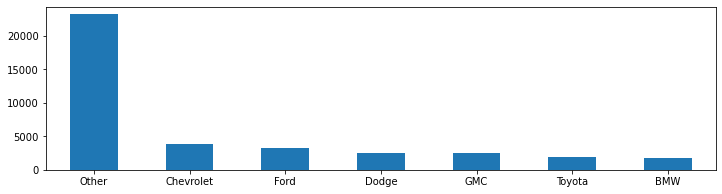

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
(fueleco2['make']
 .value_counts()
 .plot.bar(ax=ax, rot=0)
)

<AxesSubplot:xlabel='make', ylabel='count'>

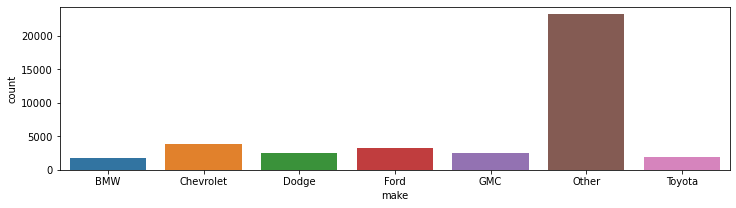

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
sns.countplot(data=fueleco2, x='make', ax=ax)

In [40]:
(fueleco2['rangeA']
 .str.extract(r'([^0-9.])')
 .dropna()
 .squeeze()
 #.apply(lambda row: ''.join(row), axis=1)
 .value_counts()
)

/    280
-     71
Name: 0, dtype: int64

In [50]:
(fueleco2['rangeA']
 .fillna('0')
 .str.replace('-', '/')
 .str.split('/', expand=True)
 .astype('float')
 .mean(axis=1)
 .pipe(lambda ser: pd.cut(ser, [-1, 0, 3, 5, 10, 20, 30, 50, 100, 300, 500]))
 .value_counts()
)

(-1, 0]       37616
(300, 500]      793
(100, 300]      611
(10, 20]         50
(30, 50]         14
(50, 100]         9
(20, 30]          7
(5, 10]           1
(0, 3]            0
(3, 5]            0
dtype: int64

In [55]:
(fueleco2['city08']
 .pipe(lambda ser: pd.qcut(ser, 10))
 .value_counts()
)

(5.999, 13.0]    5939
(19.0, 21.0]     4477
(14.0, 15.0]     4381
(17.0, 18.0]     3912
(16.0, 17.0]     3881
(15.0, 16.0]     3855
(21.0, 24.0]     3676
(24.0, 150.0]    3235
(13.0, 14.0]     2898
(18.0, 19.0]     2847
Name: city08, dtype: int64